**De arreglo a grafo**

In [14]:
import graphviz as gv

#generar el grafo

def drawUF(myList):
    dot = gv.Digraph(comment="UFDS")
    lon = len(myList)
    
    for i in range(lon):
        #agreglo los nodos al grafo (valor, etiqueta que se va a mostrar en el grafo)
        dot.node(str(i), chr(ord('a') + i)) #tienen que ser cadenas
        
    for j in range(lon):
        #en la arista pongo (valor del indice, valor del padre)
        if j != myList[j]:
            dot.edge(str(j),str(myList[j]))
    
    dot.graph_attr["rankdir"] = "BT" #que se muestre como arbol binario
    return dot

In [16]:
#[Find] Busca a la raiz
def quickUnion_find(lista, buscado):
    if lista[buscado] == buscado:
        return buscado
    return quickUnion_find(lista, lista[buscado])

In [18]:
#[Union] Une los grupos usando a uno de los padres como padre común
def quickUnion_union(lista,a,b):
    raizA = quickUnion_find(lista, a)
    raizB = quickUnion_find(lista, b)
    
    lista[raizA] = raizB

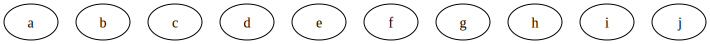

In [19]:
# Nos dan 10 individuos: a, b, c, d, e, f, g, h, i, j
#                        0  1  2  3  4  5  6  7  8  9
arr = []

for i in range(10):
    arr.append(i)

dot = drawUF(arr)
dot


In [27]:
# Las siguientes son las relaciones que deben agregarse.
# a ⇐⇒ b
# b ⇐⇒ d
# c ⇐⇒ f c
# ⇐⇒ i j
# ⇐⇒ e g
# ⇐⇒ j

#G1 = {a, b, d}
quickUnion_union(arr, 0, 1)
quickUnion_union(arr, 3, 1)
#G2 = {c, f, i}
quickUnion_union(arr, 5, 2)
quickUnion_union(arr, 8, 2)
#G3 = {e, g, j}
quickUnion_union(arr, 4, 6)
quickUnion_union(arr, 9, 6)
#G4 = {h}

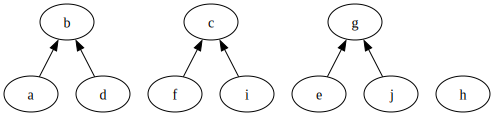

In [28]:
dot = drawUF(arr)
dot

1-2 Implemente un algoritmo para gestionar el grupo de amigos descrito en la primera parte

In [49]:
def esAmigo(lista, individuoA, individuoB):
    individuoA = ord(individuoA) - ord('a')
    individuoB = ord(individuoB) - ord('a')
    
    raizA = quickUnion_find(lista, individuoA)
    raizB = quickUnion_find(lista, individuoB)
    
    if lista[raizA] == raizB:
        return "Son amigos"
    
    return "No son amigos"


In [54]:
esAmigo(arr, 'a', 'b')

'Son amigos'